# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Емельянов Дмитрий и Черепанов Роман. Вариант №16.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Сигнал** — функция от времени $s(t)$.

**Дискретный сигнал** — сигнал, изменяющийся дискретно $s(nT), s(n)$.

**Период дискретизации** $T$ — время между двумя последовательными отсчетами дискретного сигнала.

**Частота дискретизации** — величина, обратная периоду дискретизации $\frac{1}{T}$.

**Дискретный единичный сигнал**: $\delta_d(k) = \begin{cases}
1, k = 0; \\
0, k \neq 0; \\
k = \dots, -2, -1, 0, 1, 2, \dots
\end{cases}
$

**Дискретный единичный скачок**: $\sigma_d(k) = \begin{cases}
1, k \geq 0; \\
0, k < 0; \\
k = \dots, -2, -1, 0, 1, 2, \dots
\end{cases}
$

**Дискретная экспоненциальная функция**: $s(k) = \begin{cases}
a^k, k \geq 0; \\
0, k < 0; \\
k = \dots, -2, -1, 0, 1, 2, \dots
\end{cases}
$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

Условия варианта:

|       Переменная       |            Назначение            |                  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Значение &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;                | Идентификатор |
|:----------------------:|:--------------------------------:|:------------------------------------------:|:-------------:|
| $N_b$                  |           Номер бригады          | $N_b$                                      | Nb            |
| $N$                    |     Длина последовательности     | $N = 30 + N_b \mod 5$                      | N             |
| $T$                    |       Период дискретизации       | $T = 0.0005(1 + N_b \mod 3)$               | T             |
| $a$                    |       Основание экспоненты       | $a = (−1)^{N_b}(0.8 + 0.005(N_b \mod 20))$ | a             |
| $C$                    | Амплитуда гармонического сигнала | $C = 1 + N_b \mod 5$                       | C             |
| $\hat{\omega}_0 (рад)$ |  Частота гармонического сигнала  | $\hat{\omega}_0 = \pi/(6 + N_b \mod 5)$    | w0            |
| $m$                    |             Задержка             | $m = 5 + N_b \mod 5$                       | m             |


### Порядок выполнения работы
1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:
  * Взаимосвязь между дискретным и дискретным нормированным временем;
  * Различие между единичным цифровым импульсом и дельта-функцией.

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить:
  * Соответствие между дискретным и аналоговым единичными скачками;
  * Чему равна частота дискретизации дискретного единичного скачка.

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k) = С\exp(j\hat\omega_0k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N - 1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.

5. Вывести графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n \in [0, N - 1]$. Записать формулы задержанных последовательностей.

6. Сделать выводы.

## Выполнение работы

### Условия варианта

In [ ]:
import numpy as np  # импорт библиотек
import matplotlib.pyplot as plt
from math import pi, sin, cos

Nb = 16
N = 30 + Nb % 5
T = 0.0005*(1 + Nb % 3)
a = (-1)**Nb*(0.8 + 0.005*(Nb % 20))
C = 1 + Nb % 5
w0 = pi/(6 + Nb % 5)
m = 5 + Nb % 5

In [ ]:
def delta(k):
  """Дискретный единичный сигнал"""
  return 1 if k == 0 else 0

def sigma(k):
  """Дискретный единичный скачок"""
  return 1 if k >= 0 else 0

samples = range(0, N)
nsamples = [T*sample for sample in samples]

### 1) Единичный цифровой импульс

---

Смоделируем единичный цифровой импульс $\delta_d (k)$, после чего отобразим данный импульс с помощью графиков на интервале дискретного времени $nT \in [0, (N-1)T]$ и дискретного нормированного времени $n \in [0, N-1]$.

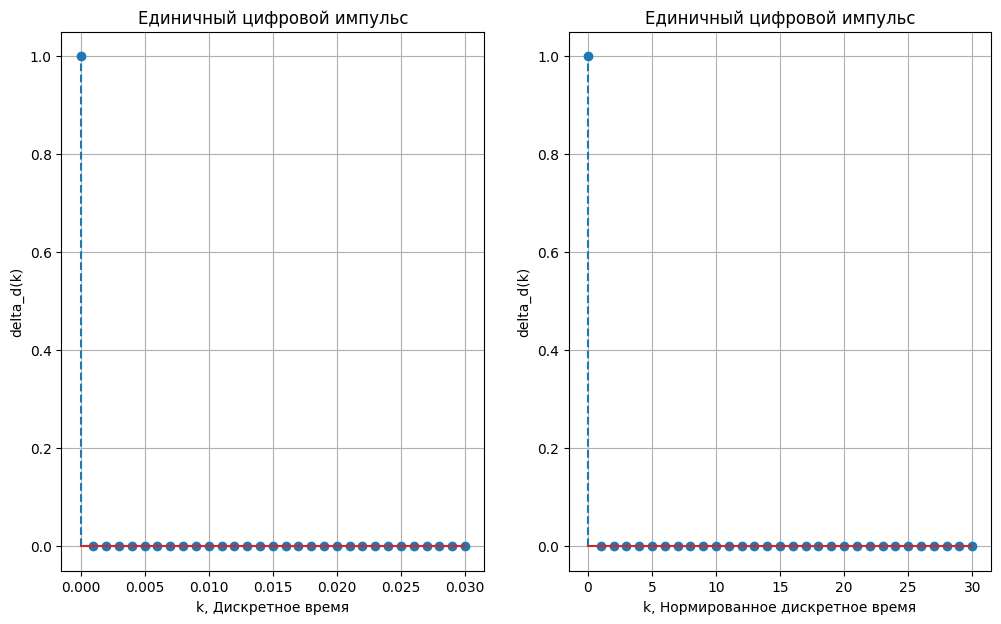

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].stem(nsamples, [delta(nsample/T) for nsample in nsamples], linefmt='--')
axs[0].set_title("Единичный цифровой импульс")
axs[0].set_xlabel("k, Дискретное время")
axs[0].set_ylabel("delta_d(k)")
axs[0].grid()

axs[1].set_title("Единичный цифровой импульс")
axs[1].set_xlabel("k, Нормированное дискретное время")
axs[1].set_ylabel("delta_d(k)")
axs[1].stem(samples, [delta(nsample) for nsample in nsamples], linefmt='--')
axs[1].grid()

**а) Взаимосвязь между дискретным и дискретным нормированным временем.**  
Дискретное нормированное время позволяет масштабировать дискретное время для устранения зависимости от периода дискретизации $T$. Можно сказать, что дискретное нормированное время является частным случаем дискретного времени при $T=1$.

**б) Различие между единичным цифровым импульсом и дельта-функцией.**  
Единичный цифровой импульс является дискретным аналогом дельта-функции и определен для целых значений аргумента, когда дельта-функция определена на всей вещественной прямой. В точке 0 дельта-функция принимает бесконечно большое значение, а единичный цифровой импульс в точке 0 равен 1.

### 2) Дискретный единичный скачок

---

Смоделируем дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$.



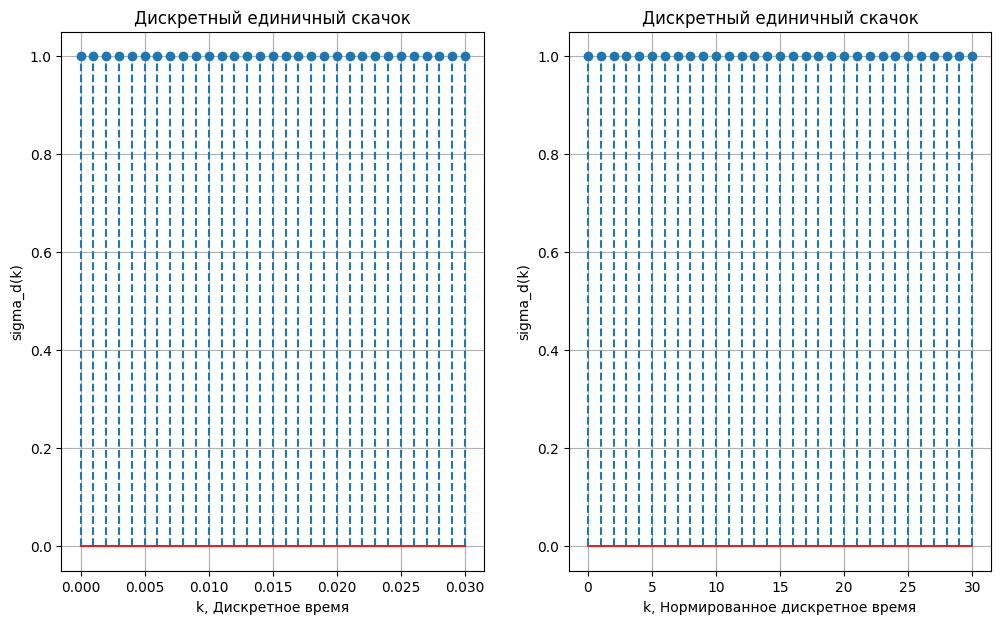

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].set_title("Дискретный единичный скачок")
axs[0].set_xlabel("k, Дискретное время")
axs[0].set_ylabel("sigma_d(k)")
axs[0].stem(nsamples, [sigma(nsample/T) for nsample in nsamples], linefmt='--')
axs[0].grid()

axs[1].set_title("Дискретный единичный скачок")
axs[1].set_xlabel("k, Нормированное дискретное время")
axs[1].set_ylabel("sigma_d(k)")
axs[1].stem(samples, [sigma(sample) for sample in samples], linefmt='--')
axs[1].grid()

**a) Соответствие между дискретным и аналоговым единичными скачками.**  
Дискретный и аналоговый единичные скачки представляют собой переходы амплитуды от значения 0 к 1, однако дискретный единичный скачок применяется к дискретным сигналам и времени, а аналоговый единичный скачок - к аналоговым сигналам с непрерывным временем.

**б) Чему равна частота дискретизации дискретного единичного скачка.**  
Частота дискретизации в общем случае $f_d=\frac{1}{T}$. В данной работе $T=0.001$, поэтому $=\frac{1}{0.001}=1000$.

In [ ]:
print(f"Период равен {T}")
print(f"Частота дискретизации равна {1/T}")

Период равен 0.001
Частота дискретизации равна 1000.0


### 3) Дискретная экспоненциальная функция

---

Смоделируем дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0, (N - 1)T]$ и дискретного нормированного времени $n \in [0, N - 1]$

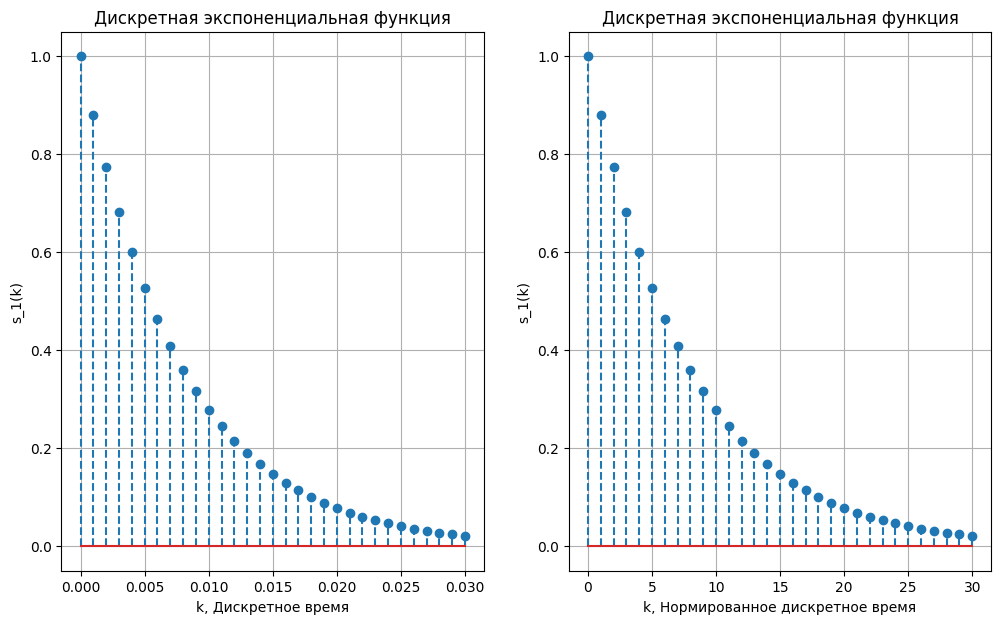

In [ ]:
def s1(k):
  """Дискретная экспоненциальная функция"""
  return a**k if k >= 0 else 0

f, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].set_title("Дискретная экспоненциальная функция")
axs[0].set_xlabel("k, Дискретное время")
axs[0].set_ylabel("s_1(k)")
axs[0].stem(nsamples, [s1(nsample/T) for nsample in nsamples], linefmt='--')
axs[0].grid()

axs[1].set_title("Дискретная экспоненциальная функция")
axs[1].set_xlabel("k, Нормированное дискретное время")
axs[1].set_ylabel("s_1(k)")
axs[1].stem(samples, [s1(sample) for sample in samples], linefmt='--')
axs[1].grid()

**Cоответствие между дискретной и аналоговой экспонентами.**

Дискретная экспоненциальная функция получается в результате дискретизации аналоговой экспоненты.  
При $k < 0$ дискретная экспонента принимает значение 0, в то время как аналоговая экспонента принимает значение $a^k$.

### 4) Дискретный комплексный гармонический сигнал


---

Смоделируем дискретный комплексный гармонический сигнал $s_2(k) = С\exp(j\hat\omega_0k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0, N - 1]$.


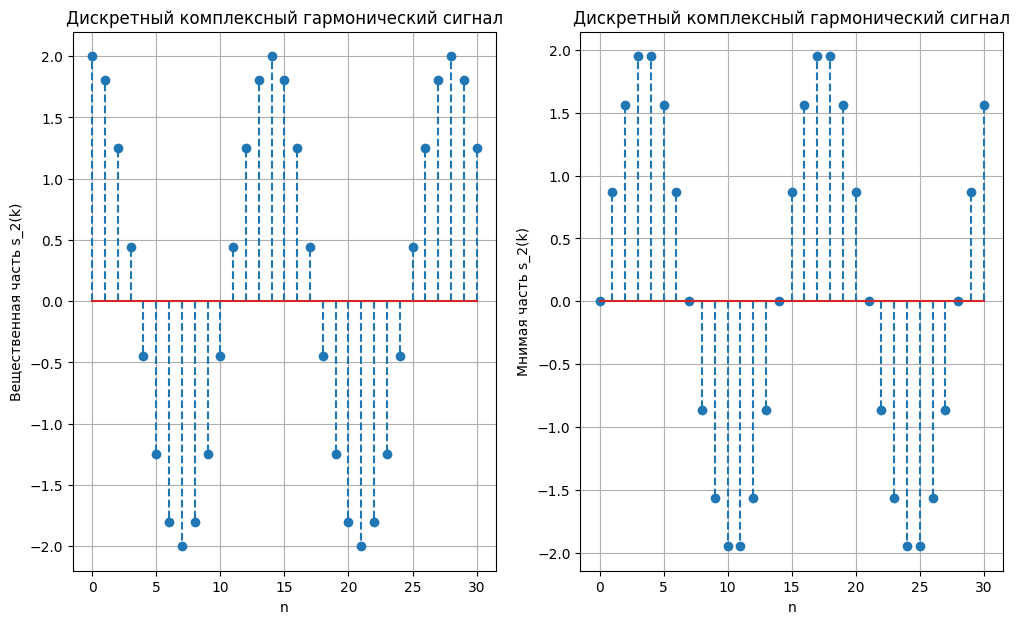

In [ ]:
import cmath

def s2(k):
  """Дискретный комплексный гармонический сигнал"""
  return C*cmath.exp(1j*w0*k)

s2_samples = list(s2(sample) for sample in samples)

f, axs = plt.subplots(1, 2, figsize=(12, 7))

axs[0].set_title("Дискретный комплексный гармонический сигнал")
axs[0].set_xlabel("n")
axs[0].set_ylabel("Вещественная часть s_2(k)")
axs[0].stem(samples, [sample.real for sample in s2_samples], linefmt='--')
axs[0].grid()

axs[1].set_title("Дискретный комплексный гармонический сигнал")
axs[1].set_xlabel("n")
axs[1].set_ylabel("Мнимая часть s_2(k)")
axs[1].stem(samples, [sample.imag for sample in s2_samples], linefmt='--')
axs[1].grid()

**Записать данный сигнал в виде комбинации двух вещественных последовательностей.**


Вещественная часть описывается функцией $cos(\hatω_0k)$, мнимая часть — функцией $sin(\hatω_0k)$.

Воспользовавшись формулой Эйлера $e^{i\varphi} = \cos \varphi + i\sin \varphi$, получаем, что $s_2(k) = C \cdot e^{j \hat{\omega}_0 k} = C \cdot cos(\hat{\omega}_0 k) + j \cdot C \cdot sin(\hat{\omega}_0 k)$.


### 5) Графики последовательностей, задержанных на m отсчетов


---

Выведем графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n \in [0, N - 1]$.

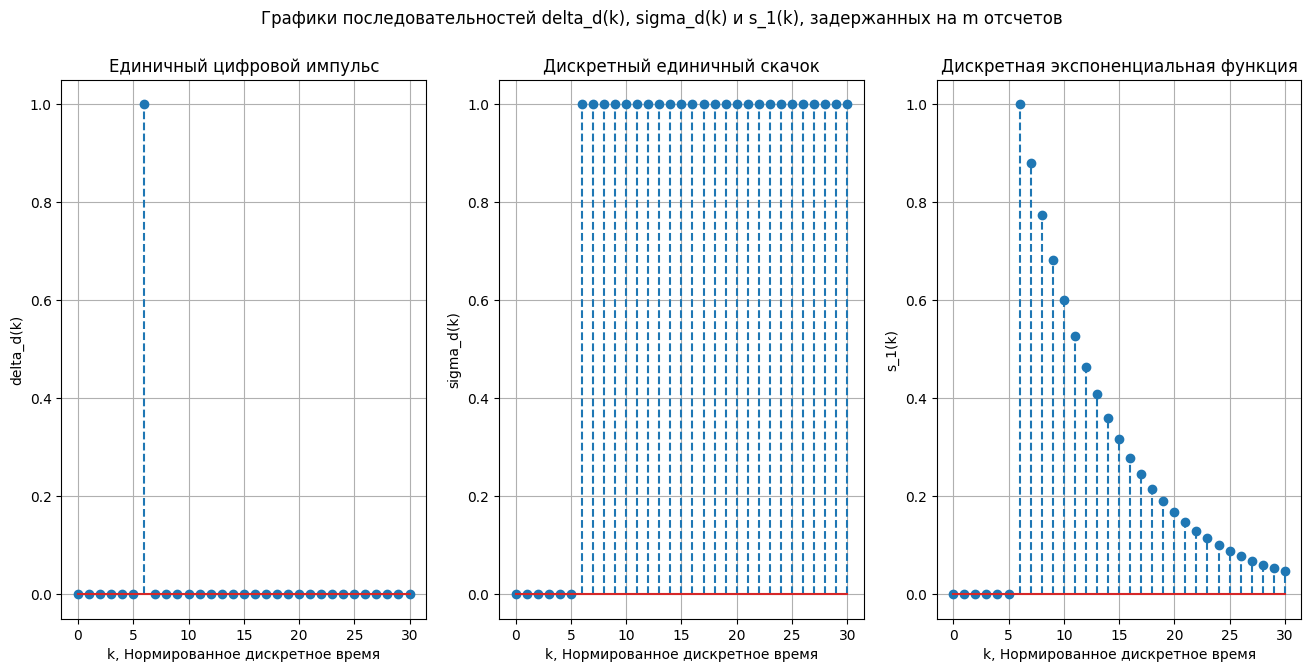

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(16, 7))
f.suptitle("Графики последовательностей delta_d(k), sigma_d(k) и s_1(k), задержанных на m отсчетов")

axs[0].stem(samples, [delta(sample - m) for sample in samples], linefmt='--')
axs[0].set_title("Единичный цифровой импульс")
axs[0].set_xlabel("k, Нормированное дискретное время")
axs[0].set_ylabel("delta_d(k)")
axs[0].grid()

axs[1].set_title("Дискретный единичный скачок")
axs[1].set_xlabel("k, Нормированное дискретное время")
axs[1].set_ylabel("sigma_d(k)")
axs[1].stem(samples, [sigma(sample - m) for sample in samples], linefmt='--')
axs[1].grid()

axs[2].set_title("Дискретная экспоненциальная функция")
axs[2].set_xlabel("k, Нормированное дискретное время")
axs[2].set_ylabel("s_1(k)")
axs[2].stem(samples, [s1(sample - m) for sample in samples], linefmt='--')
axs[2].grid()

**Записать формулы задержанных последовательностей.**  

Формулы задержанных последовательностей можно получить вычитанием задержки $m$ из аргумента.

Единичный цифровой импульс:
$$
\delta_d(k, m) = \delta_d(k - m)=
\begin{cases}
1, & k-m=0,\\
0, & k-m\neq0.
\end{cases}
$$

Дискретный единичный скачок:
$$
\sigma_d(k, m)=\sigma_d(k-m)=
\begin{cases}
1, & k-m\geq0,\\
0, & k-m<0.
\end{cases}
$$

Дискретная экспоненциальная функция:
$$
s(k, m)=s(k - m)=
\begin{cases}
0, & k-m<0,\\
a^{(k-m)}, & k-m\geq0.
\end{cases}
$$

## Выводы

В ходе выполнения практической работы были изучены единичный цифровой импульс, дискретный единичный скачок и дискретная экспоненциальная функция. Был исследован дискретный комплексный гармонический сигнал, который можно разложить в комбинацию двух вещественных сигналов. Были рассмотрены графики описанных сигналов, задержанных на m отсчётов.  
Были рассмотрены связи аналоговых сигналов и соответствующих им дискретных сигналов.